# **Data Science and STEM Salaries**



Wanxing Dai


## Instructions

“Data Scientist” is one of the hottest jobs on the market today, as you’re surely aware. Over 60,000
data scientist salaries were scraped from levels.fyi along with some information about the employee
submitting the data. Using this data, we want you to figure out what factors best predict the overall
total compensation of a data scientist. Your task is to create a 1-4 page PDF containing your
findings. This should include any relevant graphs and tables. Please also include a file with your
raw code for our review.
Please format the PDF as if you are going to present it to someone who is familiar with analytics
concepts but is not an expert in the field. This PDF will be presented in your WAF interview. For the
format of this PDF, feel free to create a PowerPoint Presentation, Jupyter Notebook, Google/Word
Doc, Tableau Dashboard, or any other product you are comfortable with.
Note: The timeframe for this challenge has been shortened so that you don’t spend too much
time on it. We do not expect your final deliverable to look like a professional slide deck. We
suggest you spend most of your time on understanding the data and finding insights -- a basic
presentation is fine as long as you get the relevant information across.
The dataset is available on Kaggle at this link. Be sure to look through the data on Kaggle, as each
column has a short description explaining what its values mean.
Our team has looked at the data and given you a few tasks that you may be interested in completing.
You may choose to tackle some, all, or none of them. Again, however, you are free to examine and
present the data however you like.

1. Does the data have any interesting quirks or features? Missing rows/numbers? How are the
distributions for each column? Are there any important data cleaning or data processing tasks you
need to complete before you start building a model?
2. What can you tell us about the most well-paid individuals? What about their experience,
characteristics, or position makes them well-paid?
3. There are 28 columns you can use to predict total yearly compensation. Which columns did you
use? How did you come to that conclusion? Are there any variables that are highly correlated with
each other in either direction?
4. Is it “worth it” to pursue a graduate degree in exchange for potentially higher compensation? Be
prepared to defend your assumptions. (Note: this question is intentionally ambiguous – we encourage
you to come up with your own interpretation!)

**Data Source**

https://www.kaggle.com/jackogozaly/data-science-and-stem-salaries


In [1]:
!pip install pyclustertend
!pip install scikit-fuzzy
!pip install pyclustertend
from IPython.display import clear_output
clear_output()

In [1]:
import numpy as np
import pandas as pd
from itertools import chain
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [147]:
# import data
# --------------------------------------------
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/My Drive/ICU_Data_Challenge
df = pd.read_csv('salaries.csv')
data = df
print("shape: ", df.shape)
df.head()

shape:  (62642, 29)


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
timestamp                  62642 non-null object
company                    62637 non-null object
level                      62523 non-null object
title                      62642 non-null object
totalyearlycompensation    62642 non-null int64
location                   62642 non-null object
yearsofexperience          62642 non-null float64
yearsatcompany             62642 non-null float64
tag                        61788 non-null object
basesalary                 62642 non-null float64
stockgrantvalue            62642 non-null float64
bonus                      62642 non-null float64
gender                     43102 non-null object
otherdetails               40137 non-null object
cityid                     62642 non-null int64
dmaid                      62640 non-null float64
rowNumber                  62642 non-null int64
Masters_Degree             62642 non-null int64
Bachelo

In [149]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [245]:
df.totalyearlycompensation

0        127000
1        100000
2        310000
3        372000
4        157000
          ...  
62637    327000
62638    237000
62639    220000
62640    280000
62641    200000
Name: totalyearlycompensation, Length: 62642, dtype: int64

## Data cleaning

In [150]:
# check missing values
# --------------------------------------------
print("Count of missing values in each column:")
df.isna().sum()

Count of missing values in each column:


timestamp                      0
company                        5
level                        119
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64

The column gender, otherdetails, Race, and Education have over 15000
missing values.

In [151]:
# check missing values
# --------------------------------------------
print("Count of maximum missing values in row:")
np.max(df.isna().sum(axis=1))

Count of maximum missing values in row:


6

In [152]:
df_clean = df.dropna(axis=0)
df_clean.drop(columns=['rowNumber'], inplace=True)
df_clean

/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,...,1,0,0,1,0,0,0,0,Asian,PhD
23532,7/3/2020 19:56:38,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000.0,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,7/3/2020 20:03:57,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,7/3/2020 20:05:37,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,7/3/2020 20:19:06,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000.0,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,2/15/2021 19:50:36,Facebook,M2,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,7.0,Full Stack,290000.0,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
61982,3/9/2021 17:03:07,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000.0,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
61984,3/25/2021 10:45:03,Zapier,L8,Software Engineering Manager,1605000,"Denver, CO",16.0,2.0,Full Stack,250000.0,...,0,0,0,0,1,0,0,0,White,Master's Degree
61987,5/18/2021 15:34:21,Facebook,D1,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,2.0,ML / AI,315000.0,...,0,0,0,0,0,0,1,0,Black,Master's Degree


Convert timstamp to datetime

In [153]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])
df_clean['year'] = df_clean['timestamp'].dt.year
df_clean['month'] = df_clean['timestamp'].dt.month

/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

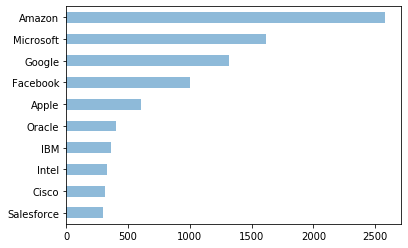

In [154]:
df_clean['company'].value_counts()
df_clean['company'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

In [155]:
df_clean['gender'].value_counts()

Male      17556
Female     3863
Other       102
Name: gender, dtype: int64

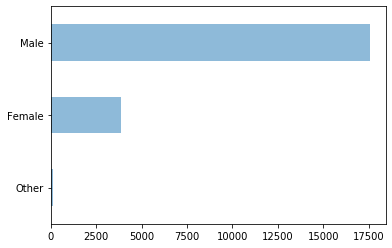

In [156]:
df_clean['gender'].value_counts().sort_values().plot.barh(alpha = 0.5)

In [157]:
df_clean['otherdetails'].value_counts()

Race: Asian, Academic Level: Master’s degree                                                                                              1205
Race: White, Academic Level: Bachelor’s degree                                                                                            1069
Race: Asian, Academic Level: Bachelor’s degree                                                                                             968
Title: Software Engineer, Race: Asian, Academic Level: Master’s degree                                                                     722
Title: Software Engineer, Race: Asian, Academic Level: Bachelor’s degree                                                                   659
                                                                                                                                          ... 
Title: Senior Designer, Race: White, Academic Level: Some college coursework completed                                                       1

In [158]:
df_clean[df_clean['otherdetails']=='7.5K relocation (Remote), Title: Applied Researcher, Race: Asian, Academic Level: Master’s degree']

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,year,month
42091,2021-02-15 12:42:06,eBay,SE 2,Data Scientist,176000,"San Jose, CA",2.0,0.0,general,133000.0,...,0,1,0,0,0,0,Asian,Master's Degree,2021,2


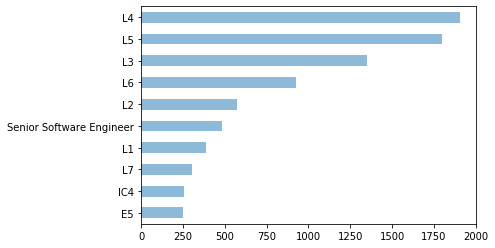

In [159]:
df_clean['level'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

In [160]:
len(df_clean['tag'].unique()), len(df_clean['level'].unique())

(1542, 1601)

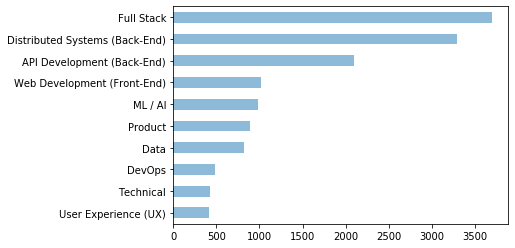

In [161]:
df_clean['tag'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

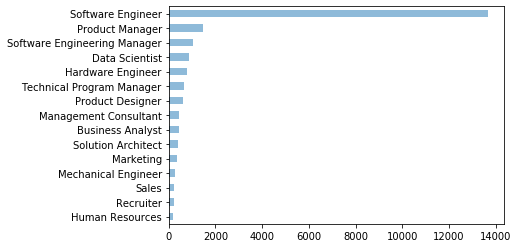

In [162]:
df_clean['title'].value_counts().sort_values().plot.barh(alpha = 0.5)

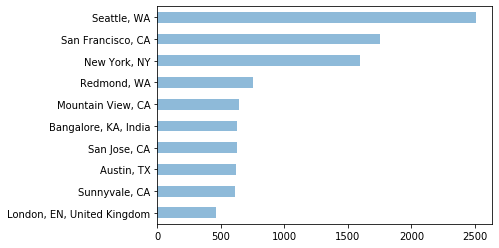

In [163]:
df_clean['location'].value_counts()[0:10].sort_values().plot.barh(alpha = 0.5)

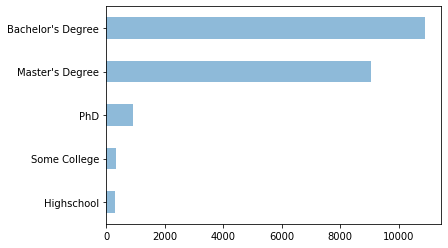

In [164]:
df_clean['Education'].value_counts().sort_values().plot.barh(alpha = 0.5)

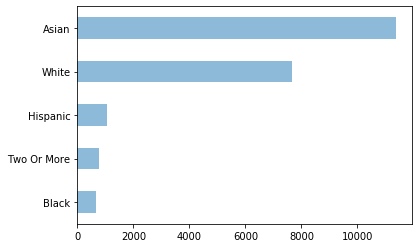

In [165]:
df_clean['Race'].value_counts().sort_values().plot.barh(alpha = 0.5)

In [166]:
df_clean

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,year,month
15710,2020-01-27 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000.0,...,0,1,0,0,0,0,Asian,PhD,2020,1
23532,2020-07-03 19:56:38,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000.0,...,0,0,0,1,0,0,Two Or More,Bachelor's Degree,2020,7
23533,2020-07-03 20:03:57,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000.0,...,0,1,0,0,0,0,Asian,Bachelor's Degree,2020,7
23534,2020-07-03 20:05:37,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000.0,...,0,1,0,0,0,0,Asian,Master's Degree,2020,7
23535,2020-07-03 20:19:06,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000.0,...,0,0,1,0,0,0,White,Bachelor's Degree,2020,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,2021-02-15 19:50:36,Facebook,M2,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,7.0,Full Stack,290000.0,...,0,1,0,0,0,0,Asian,Bachelor's Degree,2021,2
61982,2021-03-09 17:03:07,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000.0,...,0,1,0,0,0,0,Asian,Master's Degree,2021,3
61984,2021-03-25 10:45:03,Zapier,L8,Software Engineering Manager,1605000,"Denver, CO",16.0,2.0,Full Stack,250000.0,...,0,0,1,0,0,0,White,Master's Degree,2021,3
61987,2021-05-18 15:34:21,Facebook,D1,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,2.0,ML / AI,315000.0,...,0,0,0,0,1,0,Black,Master's Degree,2021,5


In [167]:
df_clean.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'Race', 'Education', 'year', 'month'],
      dtype='object')

In [168]:
df_clean.duplicated().sum()

0

There is no missing data or duplicate in the df_clean now. We are ready to start explore the data.

## **Preliminary Exploratory Data Analysis (EDA)**



## **Pre-Analysis Questions**




### Basic statistics

In [200]:
# Split 80% of data to train the supervised classifer and 20% for validation
train, test = train_test_split(df_clean, test_size=0.20, random_state=12)

In [206]:
gender_train, gender_test = train['gender'], test['gender']
race_train, race_test = train['Race'], test['Race']

In [279]:
# # define X and Y"
# # --------------------------------------------
X = pd.get_dummies(train, columns=['gender'])
X = pd.get_dummies(X, columns=['title'])
X_train = X.drop(['totalyearlycompensation','basesalary', 'bonus','stockgrantvalue', 'Race', 'Education','location','otherdetails','tag','level','timestamp','company'], axis=1).copy()
Y_train = train["totalyearlycompensation"] >= 300000

# descriptive statistics
# --------------------------------------------
X_train.describe()

,yearsofexperience,yearsatcompany,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,...,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager
count,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,...,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000,17216.000000
mean,7.118436,2.692321,10183.010455,561.697433,0.423734,0.504124,0.042983,0.014115,0.015160,0.528636,...,0.016496,0.011733,0.027997,0.067031,0.010223,0.009816,0.636211,0.047107,0.019052,0.028171
std,5.849261,3.310684,7723.940418,315.173289,0.494164,0.499998,0.202825,0.117968,0.122194,0.499194,...,0.127378,0.107686,0.164970,0.250082,0.100594,0.098593,0.481103,0.211875,0.136712,0.165467
min,0.000000,0.000000,1153.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,7322.000000,501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,2.000000,8198.000000,751.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,10.000000,4.000000,11521.000000,807.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,45.000000,40.000000,47926.000000,881.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [278]:
X = pd.get_dummies(test, columns=['gender'])
X = pd.get_dummies(X, columns=['title'])
X_test = X.drop(['totalyearlycompensation','basesalary', 'bonus','stockgrantvalue', 'Race', 'Education','location','otherdetails','tag','level','timestamp','company'], axis=1).copy()
Y_test = test["totalyearlycompensation"] >= 300000

In [270]:
X_train.columns

Index(['yearsofexperience', 'yearsatcompany', 'cityid', 'dmaid',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'year', 'month', 'gender_Female',
       'gender_Male', 'gender_Other', 'title_Business Analyst',
       'title_Data Scientist', 'title_Hardware Engineer',
       'title_Human Resources', 'title_Management Consultant',
       'title_Marketing', 'title_Mechanical Engineer',
       'title_Product Designer', 'title_Product Manager', 'title_Recruiter',
       'title_Sales', 'title_Software Engineer',
       'title_Software Engineering Manager', 'title_Solution Architect',
       'title_Technical Program Manager'],
      dtype='object')

In [271]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4305 entries, 53931 to 36851
Data columns (total 46 columns):
timestamp                             4305 non-null datetime64[ns]
company                               4305 non-null object
level                                 4305 non-null object
totalyearlycompensation               4305 non-null int64
location                              4305 non-null object
yearsofexperience                     4305 non-null float64
yearsatcompany                        4305 non-null float64
tag                                   4305 non-null object
basesalary                            4305 non-null float64
stockgrantvalue                       4305 non-null float64
bonus                                 4305 non-null float64
otherdetails                          4305 non-null object
cityid                                4305 non-null int64
dmaid                                 4305 non-null float64
Masters_Degree                        4305 non-nul

In [272]:
# descriptive statistics of Y
Y.describe()

count    2.152100e+04
mean     1.979472e+05
std      1.331233e+05
min      1.000000e+04
25%      1.190000e+05
50%      1.740000e+05
75%      2.450000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

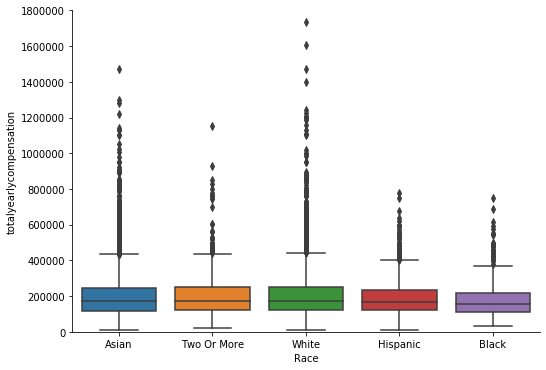

In [257]:
ax = sns.catplot(x="Race", y="totalyearlycompensation", kind="box", data=df_clean, aspect=1.5)
ax.set(ylim=(0, 1800000))

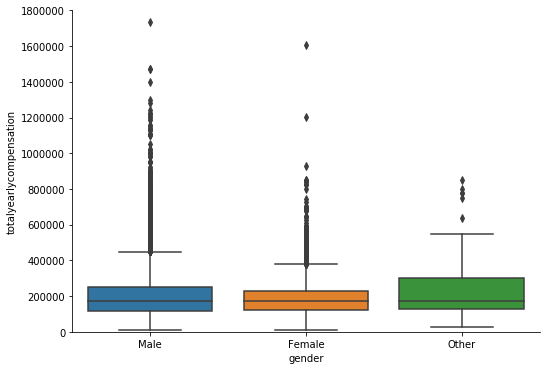

In [256]:
ax = sns.catplot(x="gender", y="totalyearlycompensation", kind="box", data=df_clean, aspect=1.5)
ax.set(ylim=(0, 1800000))

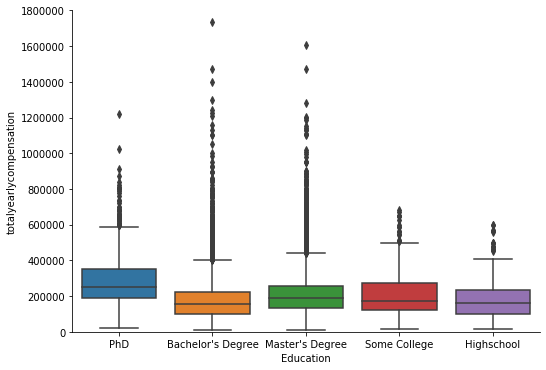

In [27]:
ax = sns.catplot(x="Education", y="totalyearlycompensation", kind="box", data=df_clean, aspect=1.5)
ax.set(ylim=(0, 1800000))

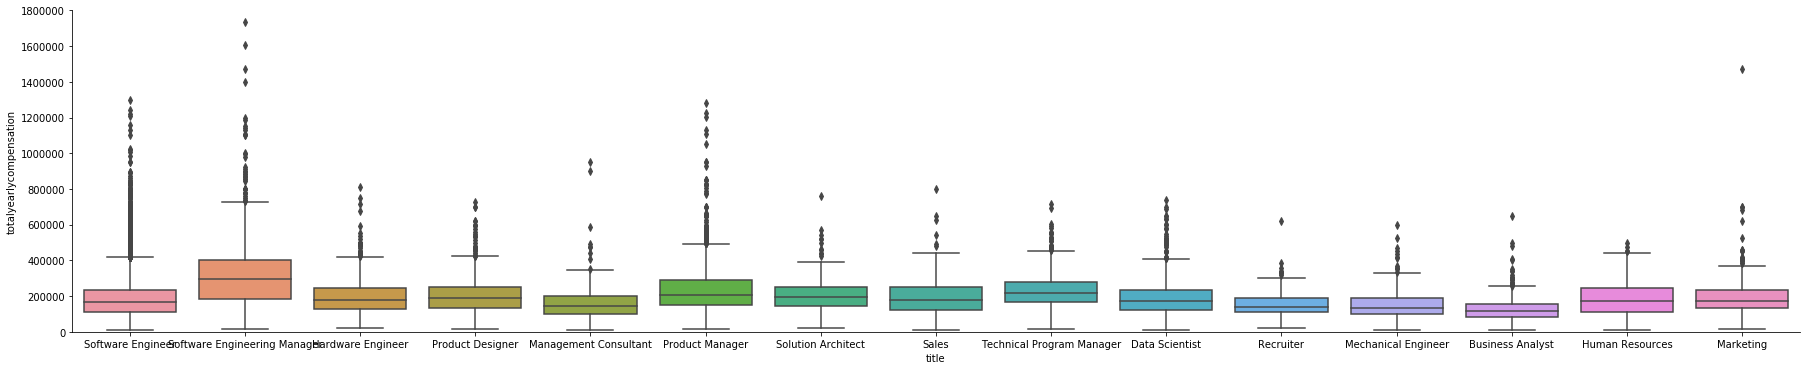

In [28]:
ax = sns.catplot(x="title", y="totalyearlycompensation", kind="box", data=df_clean, aspect=5)
ax.set(ylim=(0, 1800000))

In [29]:
df_clean.groupby('Education')['totalyearlycompensation'].median()

Education
Bachelor's Degree    156000
Highschool           161500
Master's Degree      187000
PhD                  250000
Some College         172000
Name: totalyearlycompensation, dtype: int64

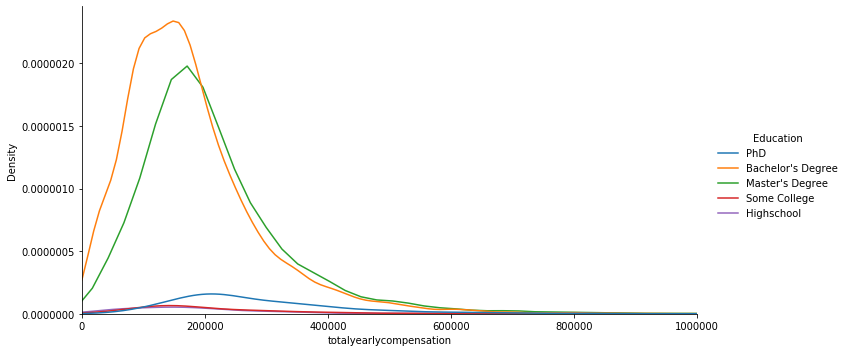

In [32]:
ax = sns.displot(df_clean, x="totalyearlycompensation", hue="Education", kind="kde",aspect = 2)
ax.set(xlim=(0, 1000000))

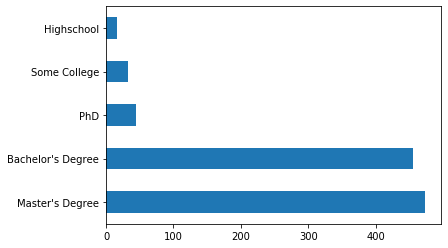

In [33]:
df_clean[df_clean['title']=='Software Engineering Manager']['Education'].value_counts().plot.barh()

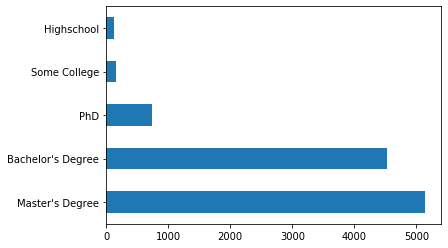

In [34]:
df_clean[df_clean['totalyearlycompensation']>df_clean['totalyearlycompensation'].median()]['Education'].value_counts().plot.barh()

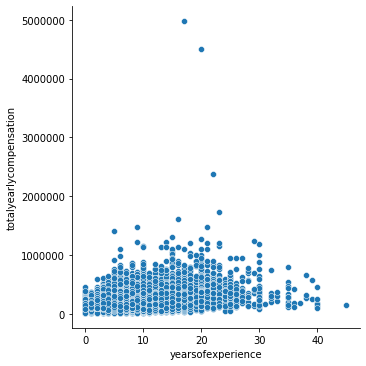

In [35]:
sns.relplot(x="yearsofexperience", y="totalyearlycompensation", data=df_clean,aspect=1)

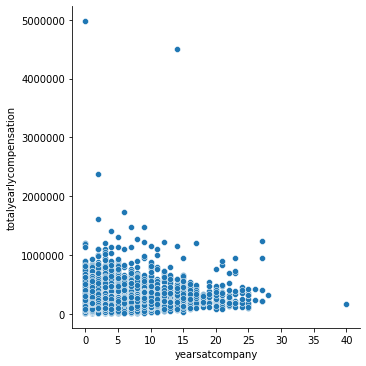

In [36]:
sns.relplot(x="yearsatcompany", y="totalyearlycompensation", data=df_clean, aspect=1)

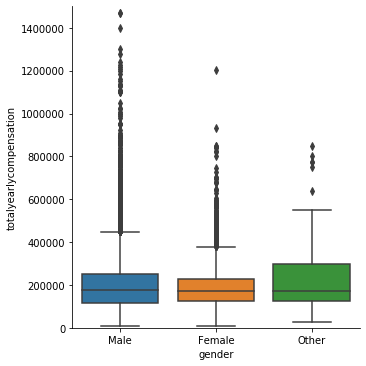

In [37]:
ax = sns.catplot(x="gender", y="totalyearlycompensation", kind="box", data=df_clean)
ax.set(ylim=(0, 1500000))

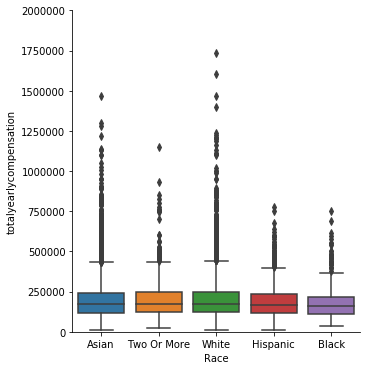

In [38]:
ax = sns.catplot(x="Race", y="totalyearlycompensation", kind="box", data=df_clean)
ax.set(ylim=(0, 2000000))

### Pairwise relationship

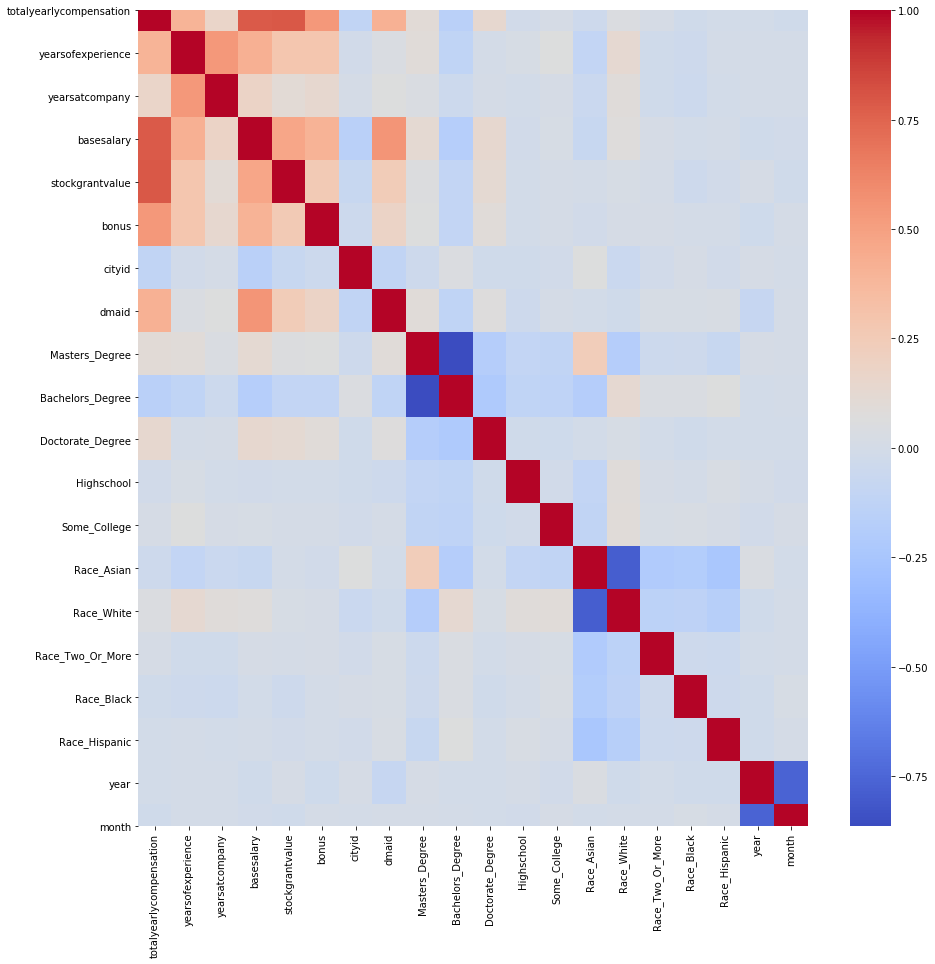

In [39]:
plt.figure(figsize=(15,15))
cor = df_clean.corr()
sns.heatmap(cor, cmap='coolwarm', fmt='0.1f')
plt.show()

In [40]:
#Correlation with output variable
cor_target = cor['totalyearlycompensation']
#Selecting highly correlated features
relevant_features = cor_target[abs(cor_target)>0.15]
relevant_features.sort_values(ascending=False)

totalyearlycompensation    1.000000
stockgrantvalue            0.794439
basesalary                 0.784558
bonus                      0.540633
dmaid                      0.410527
yearsofexperience          0.402809
yearsatcompany             0.167440
Bachelors_Degree          -0.155165
Name: totalyearlycompensation, dtype: float64

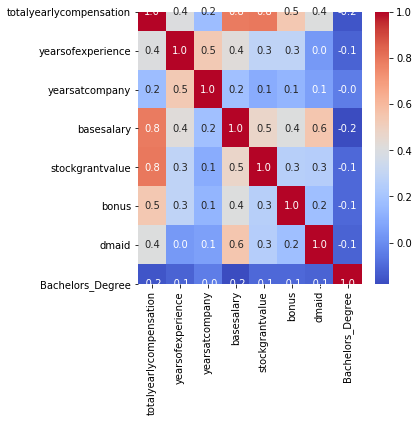

In [44]:
plt.figure(figsize=(5,5))
cor = df_clean[relevant_features.index].corr()
sns.heatmap(cor, cmap='coolwarm', annot = True, fmt='0.1f')
plt.show()

# Modeling

In [192]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Split 80% of data to train the supervised classifer and 20% for validation
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=12)

In [176]:
# standardize the data
# --------------------------------------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X_train)
sX = pd.DataFrame(scaled_x, columns=X.columns) 
sX.describe()

ValueError: could not convert string to float: 'Asian'

In [44]:
Y.value_counts()

150000     324
200000     299
180000     263
170000     254
120000     250
          ... 
1005000      1
1400000      1
612000       1
890000       1
759000       1
Name: totalyearlycompensation, Length: 713, dtype: int64

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=33)
x2 = pca.fit_transform(X_train)

# Let's see the components
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_

array([0.99835905, 0.00164   , 0.00000064, 0.00000016, 0.00000012,
       0.00000001, 0.00000001, 0.00000001, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

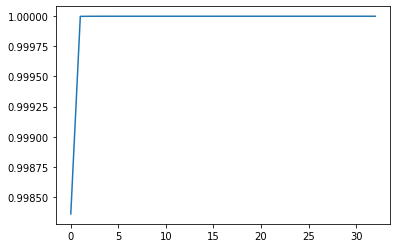

In [46]:
import matplotlib
import matplotlib.pyplot as plt

# See how much is contributed by the first few terms
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

The data is clusterable as the hopkins statistics are close to 0.

In [47]:
from pyclustertend import hopkins
n=len(X)
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
  n = len(sX)
  p = int(0.1 * n) 
  hopkins_stats.append(hopkins(X,p))
print(hopkins_stats)

[0.007261793921456786, 0.0070889597307458455, 0.00924311763112555, 0.005633472876587728, 0.008994191293074324]


## Clustering

In [48]:
from sklearn.cluster import KMeans
cluster_number_list = range(1,12)
avg_inertia_list = []
for k in cluster_number_list:
  sub_inertia_list=[]
  for i in range(0,3):
    kmeans=KMeans(n_clusters=k).fit(X)
    sub_inertia_list.append(kmeans.inertia_)
  avg_inertia_list.append(np.average(sub_inertia_list))

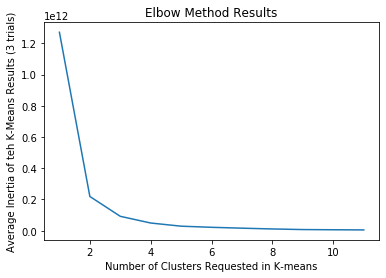

In [49]:
plt.plot(cluster_number_list, avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of teh K-Means Results (3 trials)')
plt.title('Elbow Method Results')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=2, random_state=1000).fit(X)
df_clean['predicted_cluster_kmeans'] = kmeans.labels_
df_clean['predicted_cluster_kmeans'].value_counts()

/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    20542
1      979
Name: predicted_cluster_kmeans, dtype: int64

/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(0, 1000000)]

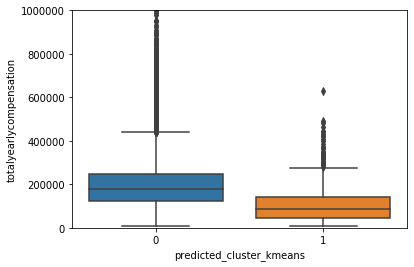

In [51]:
ax = sns.boxplot(df_clean["predicted_cluster_kmeans"], y=df_clean['totalyearlycompensation'])
ax.set(ylim=(0, 1000000))

/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


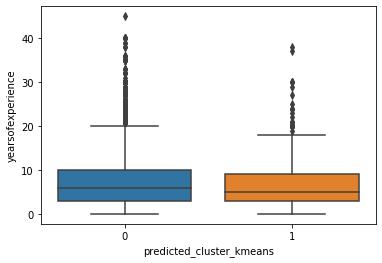

In [52]:
sns.boxplot(df_clean["predicted_cluster_kmeans"], y=df_clean['yearsofexperience'])
plt.show()

In [53]:
df_clean.groupby("predicted_cluster_kmeans")['title'].value_counts()

predicted_cluster_kmeans  title                       
0                         Software Engineer               13000
                          Product Manager                  1388
                          Software Engineering Manager      973
                          Data Scientist                    843
                          Hardware Engineer                 759
                          Technical Program Manager         619
                          Product Designer                  578
                          Management Consultant             415
                          Business Analyst                  407
                          Solution Architect                388
                          Marketing                         354
                          Mechanical Engineer               238
                          Sales                             210
                          Recruiter                         209
                          Human Resources        

/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


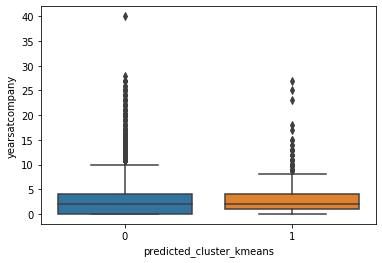

In [54]:
sns.boxplot(df_clean["predicted_cluster_kmeans"], y=df_clean['yearsatcompany'])

In [55]:
df_clean.groupby("predicted_cluster_kmeans")['Education'].value_counts()

predicted_cluster_kmeans  Education        
0                         Bachelor's Degree    10266
                          Master's Degree       8750
                          PhD                    901
                          Some College           333
                          Highschool             292
1                         Bachelor's Degree      633
                          Master's Degree        311
                          PhD                     21
                          Highschool               8
                          Some College             6
Name: Education, dtype: int64

In [56]:
df_clean.groupby("predicted_cluster_kmeans")['Race'].value_counts()

predicted_cluster_kmeans  Race       
0                         Asian          10694
                          White           7448
                          Hispanic        1029
                          Two Or More      743
                          Black            628
1                         Asian            687
                          White            205
                          Black             34
                          Hispanic          33
                          Two Or More       20
Name: Race, dtype: int64

In [57]:
df_clean.groupby("predicted_cluster_kmeans")['gender'].value_counts()

predicted_cluster_kmeans  gender
0                         Male      16721
                          Female     3723
                          Other        98
1                         Male        835
                          Female      140
                          Other         4
Name: gender, dtype: int64

In [58]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
nb_clusters = [2, 3, 4]
linkages = ['single', 'complete', 'ward', 'average']
silhouette_scores = np.zeros(shape=(len(linkages), len(nb_clusters)))
for i, l in enumerate(linkages):
  for j, nbc in enumerate(nb_clusters):
    ag = AgglomerativeClustering(n_clusters=nbc, affinity='euclidean', linkage= l)
    Y_pred = ag.fit_predict(X)
    sls = silhouette_score(X, Y_pred, random_state=1000)
    silhouette_scores[i, j] = sls
for i in range(len(nb_clusters)):
  plt.plot(silhouette_scores[:, i])
  plt.ylabel('Silhouette score', fontsize=14)
  plt.title('Number of clusters: {}'.format(nb_clusters[i]), fontsize=14)
  plt.xticks(np.arange(len(linkages)), linkages)
  plt.show()

KeyboardInterrupt: 

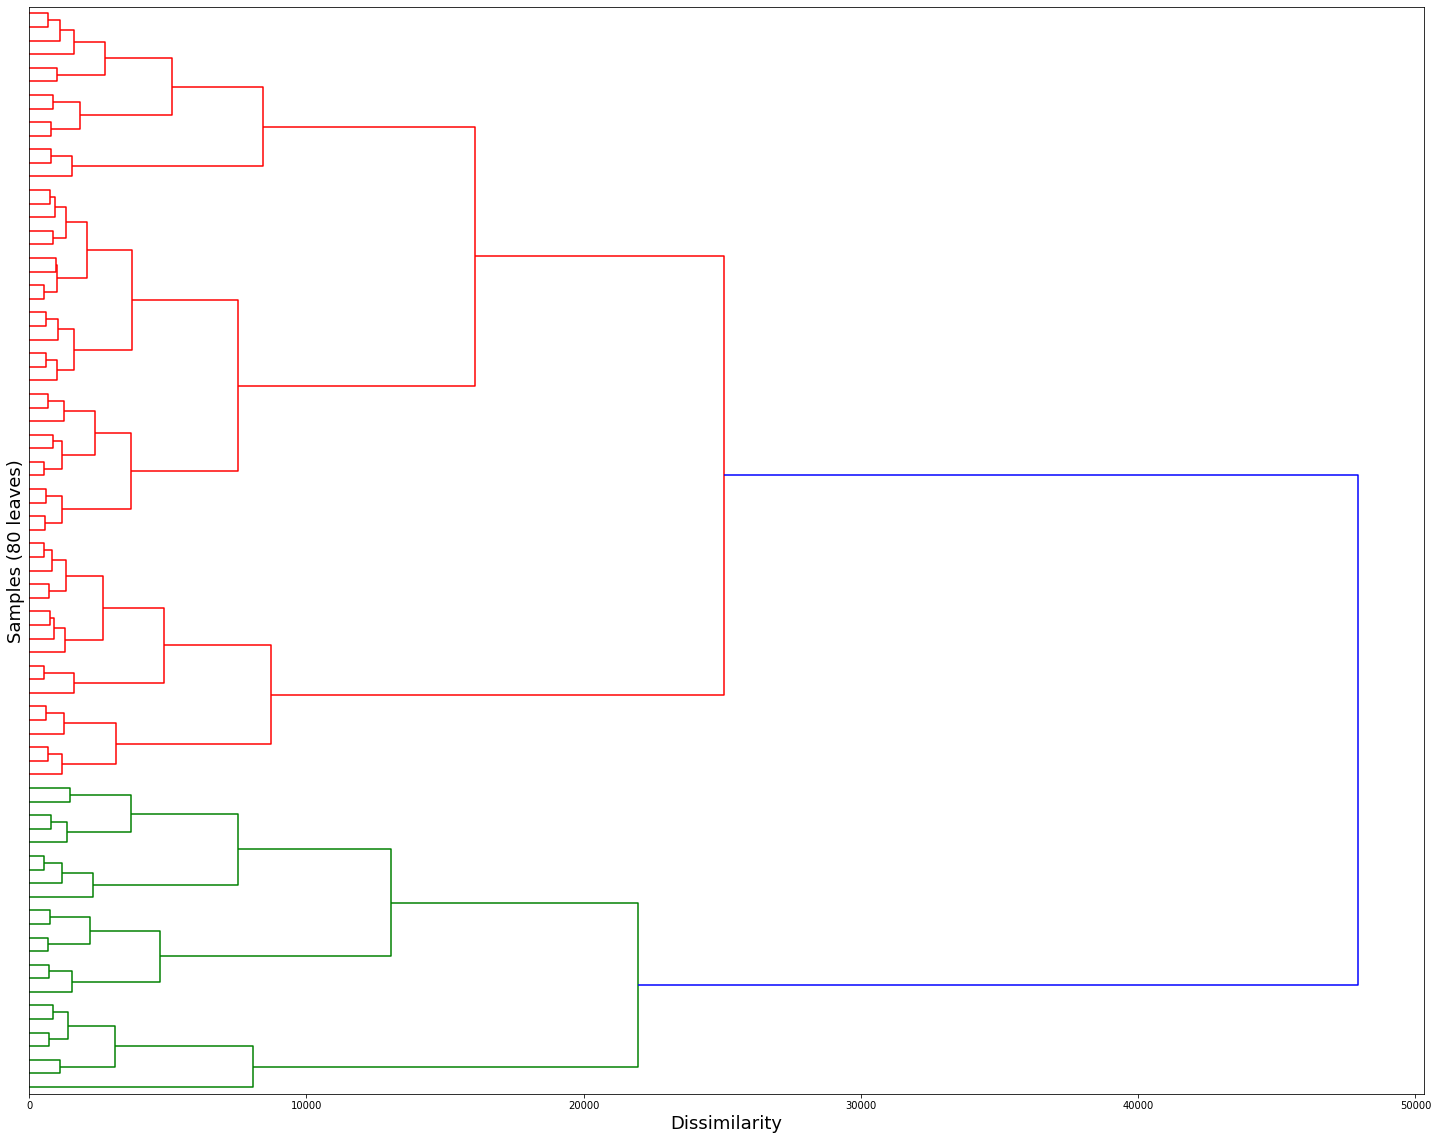

In [ ]:
# Show the truncated dendrogram for a ward linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
dm = pdist(X, metric='euclidean')
Z = linkage(dm, method='complete')
fig, ax = plt.subplots(figsize=(25, 20))
d = dendrogram(Z, orientation='right', truncate_mode='lastp', p=80, no_labels=True)
ax.set_xlabel('Dissimilarity', fontsize=18)
ax.set_ylabel('Samples (80 leaves)', fontsize=18)
plt.show()

## Linear Regression

In [59]:
from sklearn import metrics
# Train a simple LinearRegression
regr = linear_model.LinearRegression()
regr.fit(sX, y_train)
scaled_test = scaler.transform(X_test)
predictions = regr.predict(scaled_test)
rmse_lc = mean_squared_error(y_test, predictions)** 0.5

/Users/wanxing/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [60]:
rmse_lc

95810.45123963145

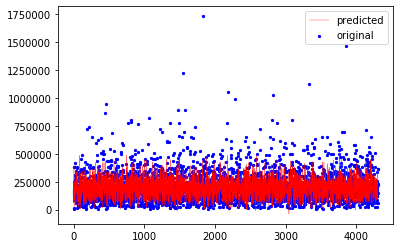

In [61]:
x_ax = range(len(predictions))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, predictions, lw = 0.3,color="red", label="predicted")
plt.legend()
plt.show()

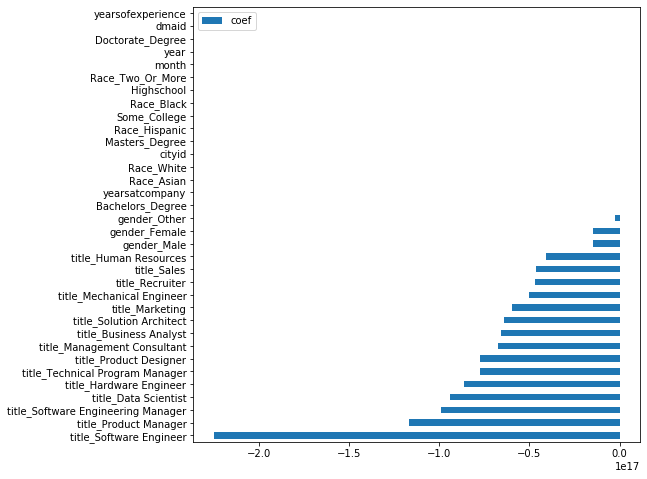

In [62]:
coefficient = pd.DataFrame(regr.coef_, index=X.columns, columns=['coef'])

coefficient.sort_values(by=['coef'], ascending=True).plot.barh(figsize=(8,8))

## Decision Tree

In [280]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = tree.DecisionTreeClassifier(random_state=10)
dt.fit(X_train, Y_train)
predictions = dt.predict(X_test)
rmse_dt = mean_squared_error(Y_test, predictions)** 0.5

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [281]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = tree.DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
rmse_dt = mean_squared_error(y_test, predictions)** 0.5

In [282]:
rmse_dt

138065.3180771664

## Evaluating fairness-related metrics

### Gender

Firstly, Fairlearn provides fairness-related metrics that can be compared between groups and for the overall population. Using existing metric definitions from scikit-learn we can evaluate metrics for subgroups within the data as below:

In [110]:
df_clean.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'Race', 'Education', 'year', 'month'],
      dtype='object')

In [128]:
X = df_clean.drop(['timestamp','totalyearlycompensation','basesalary', 'bonus','stockgrantvalue', 'year', 'month', 'Masters_Degree', 'Bachelors_Degree', 'otherdetails', 'Doctorate_Degree', 'Highschool',
'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic','tag'], axis=1).copy()
Y = df_clean["totalyearlycompensation"]

In [146]:
X

,yearsofexperience,yearsatcompany,cityid,dmaid,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,...,title_Marketing,title_Mechanical Engineer,title_Product Designer,title_Product Manager,title_Recruiter,title_Sales,title_Software Engineer,title_Software Engineering Manager,title_Solution Architect,title_Technical Program Manager
15710,5.0,5.0,7472,807.0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
23532,3.0,2.0,11521,819.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
23533,6.0,6.0,7413,807.0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
23534,4.0,4.0,11527,819.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
23535,5.0,0.0,7419,807.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,9.0,7.0,7300,807.0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
61982,20.0,14.0,7419,807.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
61984,16.0,2.0,7548,751.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
61987,22.0,2.0,7300,807.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [283]:
from fairlearn.metrics import MetricFrame
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)
gm = MetricFrame(metrics=accuracy_score, y_true=Y_test, y_pred=y_pred, sensitive_features=gender_test)
print(gm.overall)

0.8627177700348432


In [284]:
print(gm.by_group)

gender
Female    0.893671
Male      0.855918
Other     0.823529
Name: accuracy_score, dtype: object


In [285]:
from fairlearn.metrics import selection_rate
sr = MetricFrame(metrics=selection_rate, y_true=Y_test, y_pred=y_pred, sensitive_features=gender_test)
sr.overall

0.045063879210220675

In [286]:
sr.by_group

gender
Female     0.035443
Male      0.0471698
Other     0.0588235
Name: selection_rate, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad741033d0>,
      dtype=object)

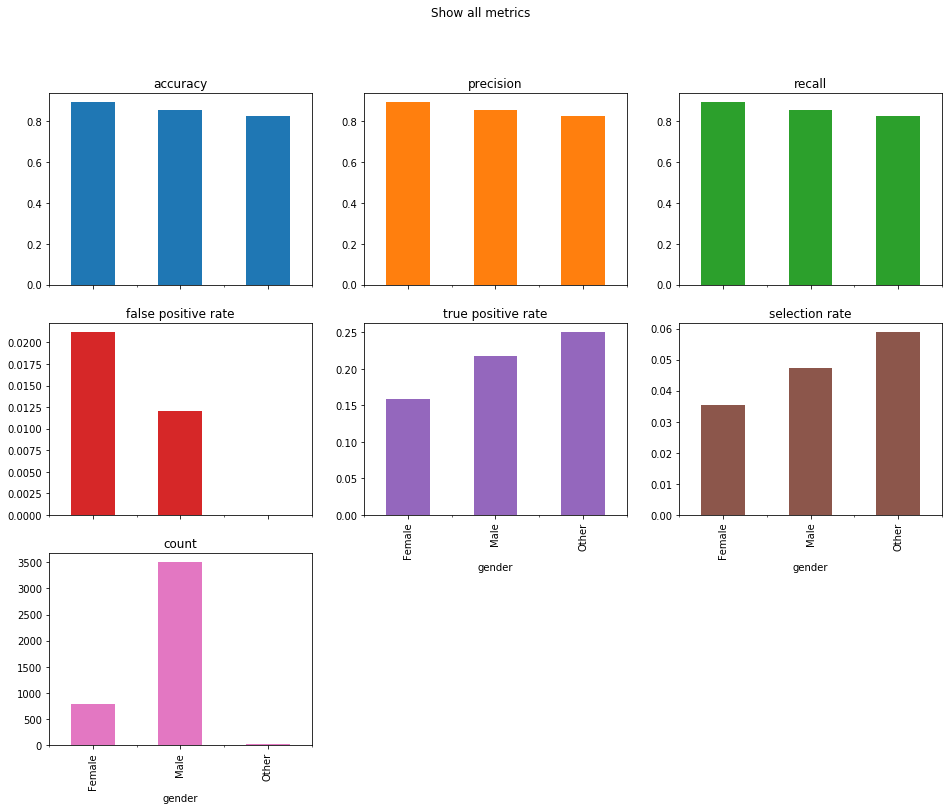

In [300]:
from fairlearn.metrics import selection_rate,false_positive_rate,true_positive_rate,count
from sklearn.metrics import precision_score, recall_score
from functools import partial

metrics = {
    'accuracy': accuracy_score,
    'precision': partial(precision_score, average='micro'),
    'recall': partial(recall_score, average= 'micro'),
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame = MetricFrame(metrics=metrics,
                           y_true=Y_test,
                           y_pred=y_pred,
                           sensitive_features=gender_test)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[16, 12],
    title="Show all metrics",
)

In [288]:
from fairlearn.reductions import ExponentiatedGradient, DemographicParity

constraint = DemographicParity()
classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
mitigator = ExponentiatedGradient(classifier, constraint)
mitigator.fit(X_train, Y_train, sensitive_features=gender_train)

y_pred_mitigated = mitigator.predict(X_test)

sr_mitigated = MetricFrame(metrics=selection_rate, y_true=Y_test, y_pred=y_pred_mitigated, sensitive_features=gender_test)
print(sr_mitigated.overall)

0.045063879210220675


In [289]:
print(sr_mitigated.by_group)

gender
Female     0.035443
Male      0.0471698
Other     0.0588235
Name: selection_rate, dtype: object


### Race

In [290]:
classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
classifier.fit(X_train, Y_train)

y_pred = classifier.predict(X_test)
gm = MetricFrame(metrics=accuracy_score, y_true=Y_test, y_pred=y_pred, sensitive_features=race_test)
print(gm.overall)

0.8627177700348432


In [291]:
print(gm.by_group)

Race
Asian          0.867982
Black          0.942446
Hispanic       0.876238
Two Or More    0.802721
White          0.851659
Name: accuracy_score, dtype: object


In [293]:
sr = MetricFrame(metrics=selection_rate, y_true=Y_test, y_pred=y_pred, sensitive_features=race_test)
sr.overall

0.045063879210220675

In [294]:
sr.by_group

Race
Asian          0.0486842
Black          0.0215827
Hispanic       0.0346535
Two Or More    0.0340136
White           0.044242
Name: selection_rate, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fad6fe241d0>,
      dtype=object)

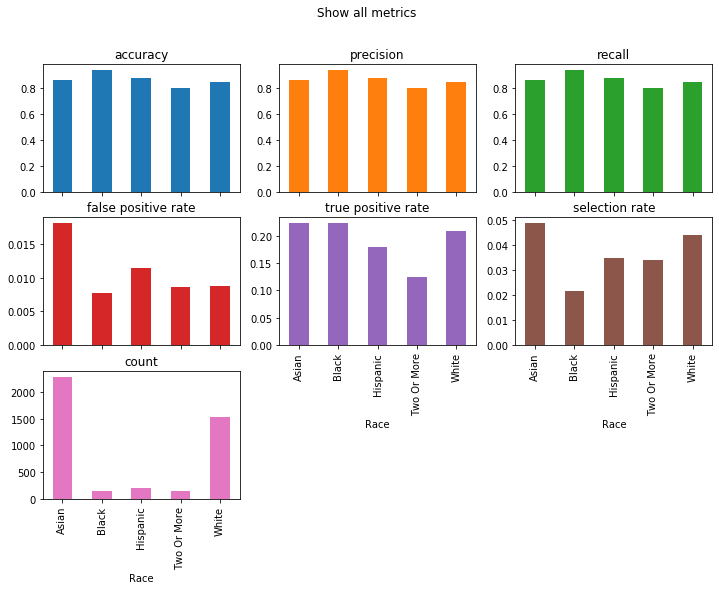

In [296]:
metrics = {
    'accuracy': accuracy_score,
    'precision': partial(precision_score, average='micro'),
    'recall': partial(recall_score, average= 'micro'),
    'false positive rate': false_positive_rate,
    'true positive rate': true_positive_rate,
    'selection rate': selection_rate,
    'count': count}
metric_frame = MetricFrame(metrics=metrics,
                           y_true=Y_test,
                           y_pred=y_pred,
                           sensitive_features=race_test)
metric_frame.by_group.plot.bar(
    subplots=True,
    layout=[3, 3],
    legend=False,
    figsize=[12, 8],
    title="Show all metrics",
)

In [302]:
constraint = DemographicParity()
classifier = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
mitigator = ExponentiatedGradient(classifier, constraint)
mitigator.fit(X_train, Y_train, sensitive_features=race_train)

y_pred_mitigated = mitigator.predict(X_test)

sr_mitigated = MetricFrame(metrics=selection_rate, y_true=Y_test, y_pred=y_pred_mitigated, sensitive_features=race_test)
print(sr_mitigated.overall)

0.045063879210220675


In [303]:
print(sr_mitigated.by_group)

Race
Asian          0.0482456
Black           0.028777
Hispanic       0.0346535
Two Or More    0.0408163
White          0.0435914
Name: selection_rate, dtype: object


## Neural Network

In [ ]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
sX = sX.values.reshape(sX.shape[0], sX.shape[1], 1)
print(sX.shape)

(17216, 34, 1)


In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(34, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")

In [ ]:
X_train_pca = sX.reshape(sX.shape[0], sX.shape[1], 1)
print(sX.shape)
model.fit(sX, y_train, batch_size=12,epochs=10, verbose=0)

(17216, 34, 1)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 33, 32)            96        
                                                                 
 flatten_1 (Flatten)         (None, 1056)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                67648     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 67,809
Trainable params: 67,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ypred = model.predict(scaled_test)
print(ypred)
print(model.evaluate(X_train_pca, y_train))
print("RMSE: %.4f" % mean_squared_error(y_test, ypred)**0.5)

[[165728.7 ]
 [197894.19]
 [264920.72]
 ...
 [151107.17]
 [266469.34]
 [211287.92]]
538/538 [==============================] - 2s 3ms/step - loss: 11836275712.0000
11836275712.0
RMSE: 97282.9823


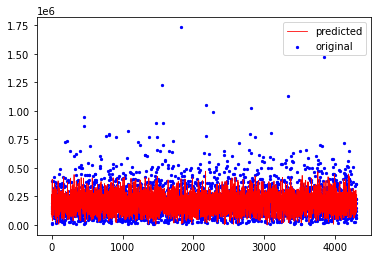

In [ ]:
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
highpay = df_clean[df_clean['totalyearlycompensation']>500000]

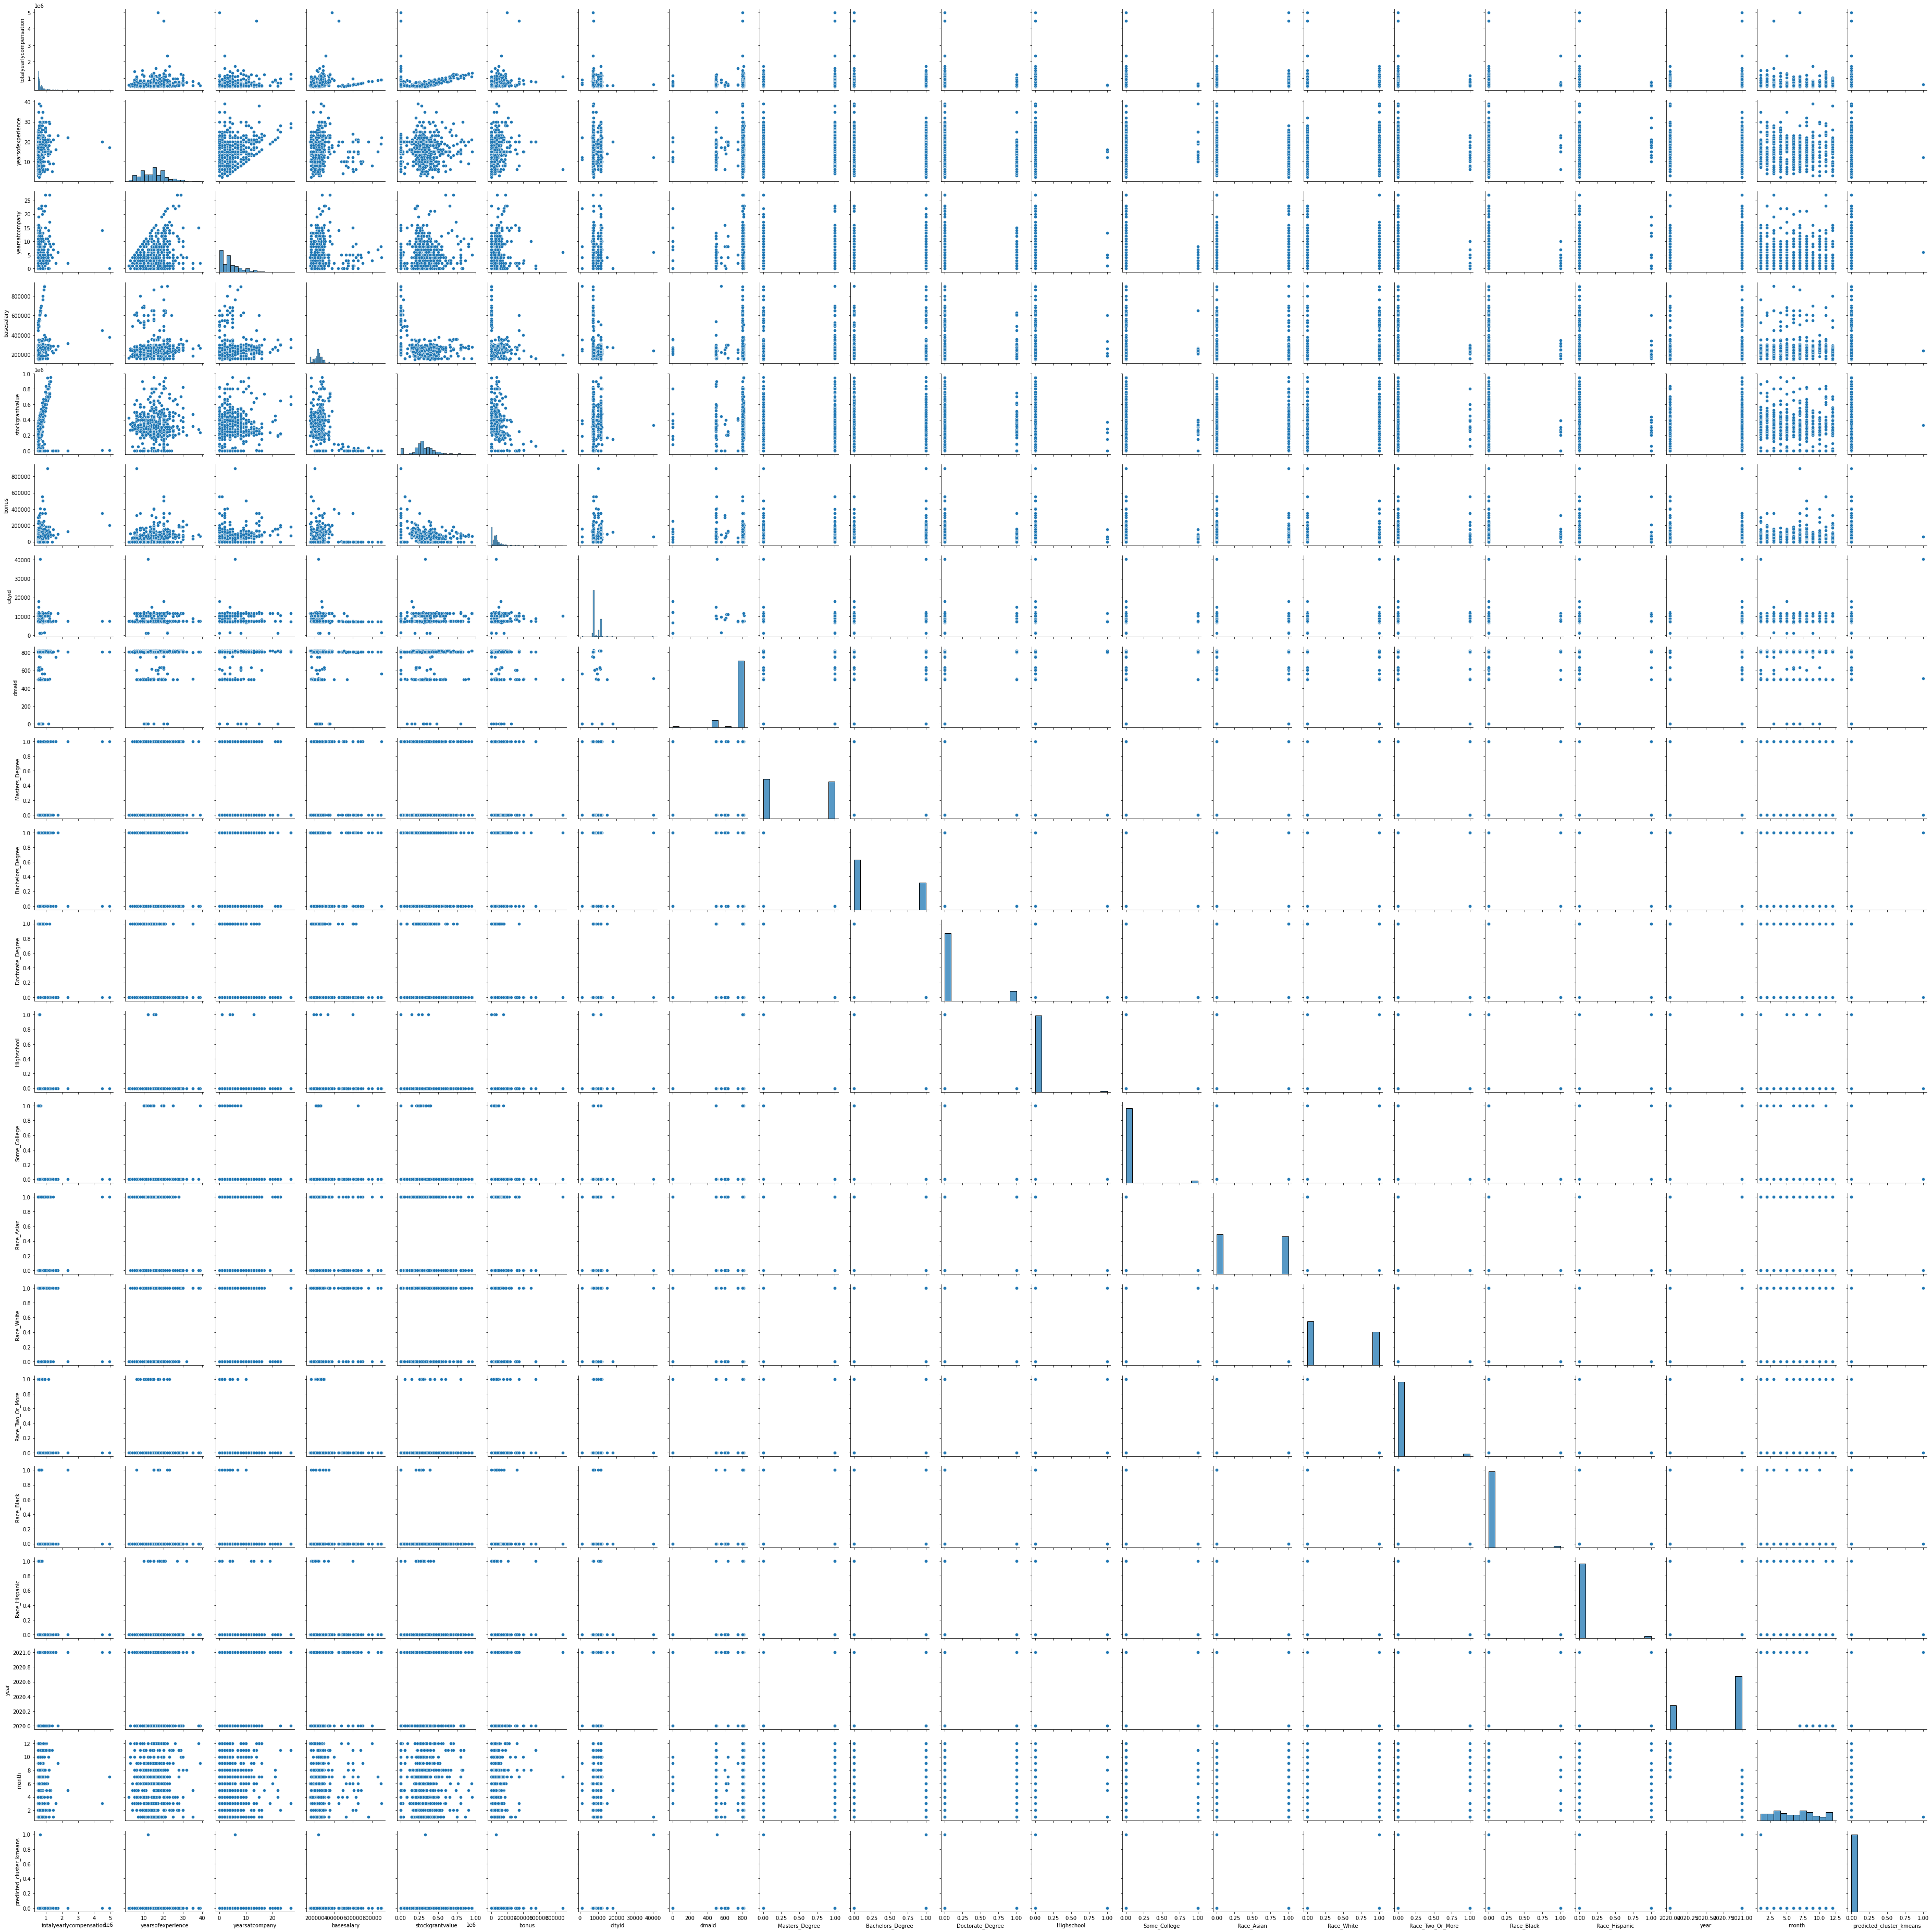

In [ ]:
sns.pairplot(highpay)